# Bike Sharing Assignment using Multiple Linear Regression

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data

In [1]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

#Supress all the Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from the provided csv file

df = pd.read_csv('day.csv')

In [3]:
# Checking few rows of the data to understand
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking total rows available using shape

df.shape

(730, 16)

In [5]:
# Describing columns to check few metrics

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking data types and other details of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check if there is any null value

df.isnull().sum()

# Since there are no null values nothing needs to be removed

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Drop duplicates in rows if any

df.drop_duplicates(inplace=True)

In [9]:
# Check the count to see if any rows are removed

df.shape

# As there were no duplicates, hence the count remains the same

(730, 16)

In [12]:
# Dropping columns which will not be useful to derive any metric
# instant has only index numbers hence not needed
# Since casual and registered columns are just some breakup, we will remove those
# dteday is dropped because we already have month and year

df.drop(['instant','casual','registered','dteday'], axis=1, inplace=True)

In [13]:
# Renaming some columns to have a meaningful name and becomes easy for understanding

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [14]:
# Mapping with some meaningful names for visualization for season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
# Mapping with some meaningful names for visualization for month column

df.month = df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [16]:
# Mapping with some meaningful names for visualization for weekday column

df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [17]:
# Mapping with some meaningful names for visualization for weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Mist',3:'LightSnow',4:'HeavyRain'})

In [18]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualising the Data

### Visualising Numeric Variables

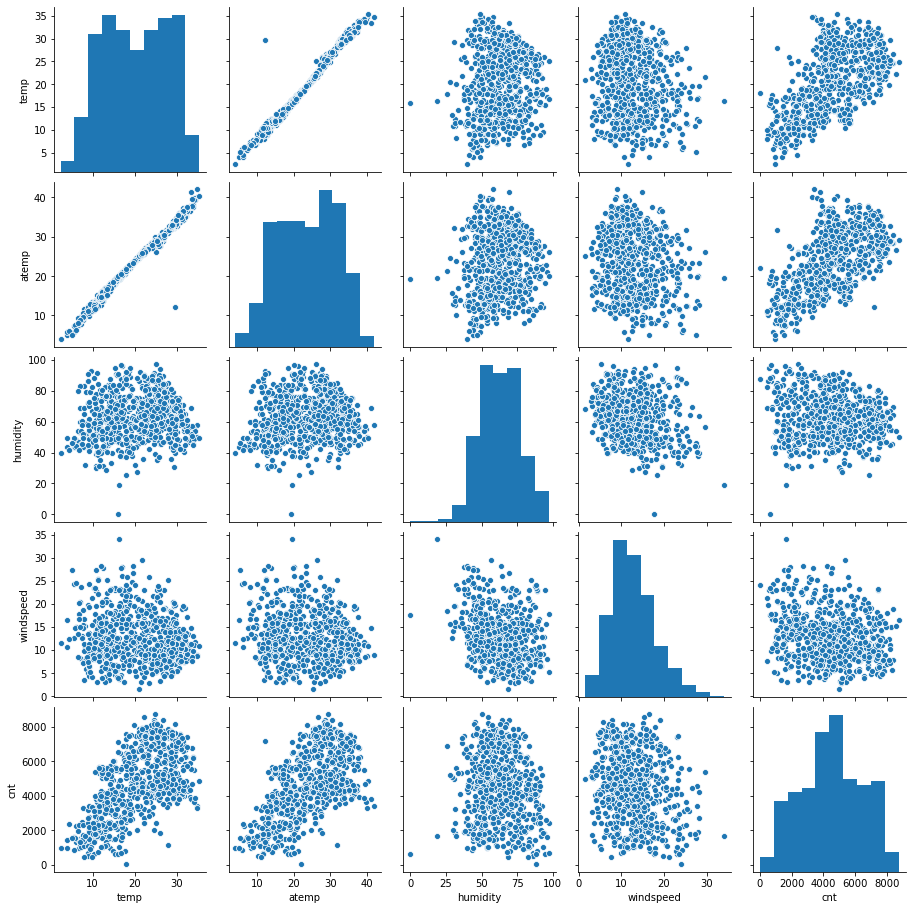

In [19]:
# Visualing numeric variables using a pairplot

sns.pairplot(data=df, vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

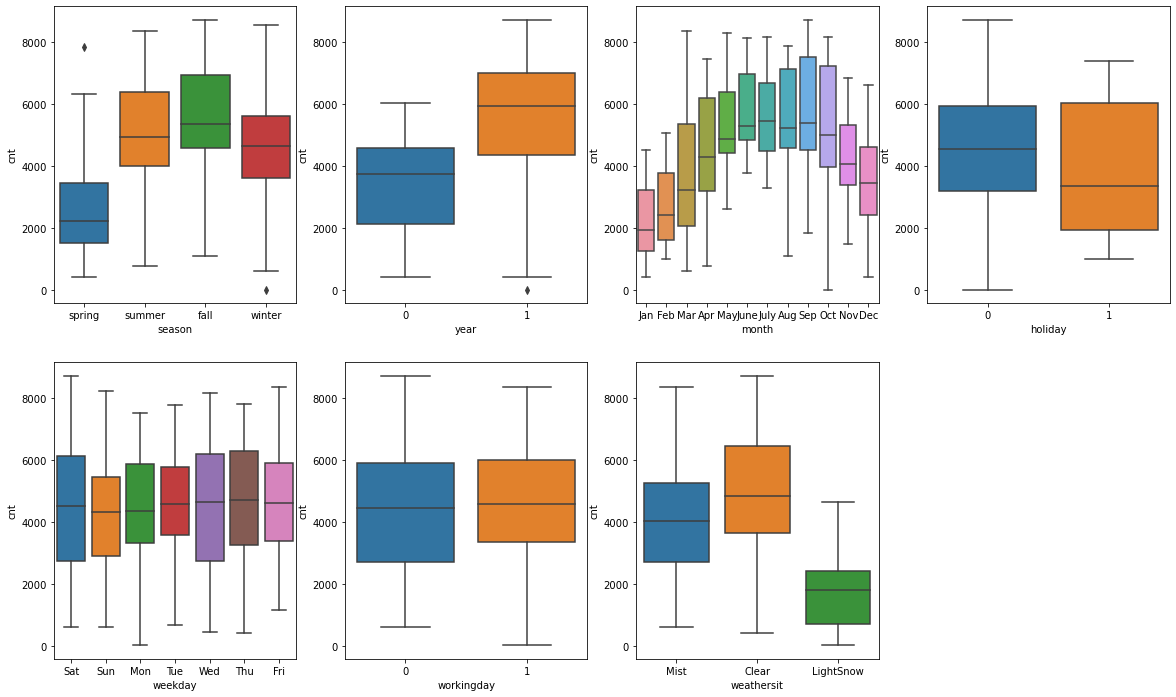

In [20]:
# Visualing categorical variables using a boxplot

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

##### Here many insights can be drawn from the plots

1. fall has highest demand for rental bikes
2. Demand has increased from 2018 to 2019
3. There is no demand for weathersit - HeavyRain and very less demand for weathersit - LightSnow
4. Demand is continuously growing each month till September and then demand is decreasing
5. When there is a holiday, demand has decreased

# Step 3: Data Preparation

### In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s for the categorical variables

In [21]:
# Creation of Dummy variable for categorical variables lik month, weekday, weathersit and season variables

months_df = pd.get_dummies(df.month, drop_first=True)
weekdays_df = pd.get_dummies(df.weekday, drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit, drop_first=True)
seasons_df = pd.get_dummies(df.season, drop_first=True)

In [22]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# Merge the results to the original dataframe

df = pd.concat([df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [24]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [25]:
# Since we have created dummy variables, we can remove the other columns which are not required

df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [26]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


# Step 4: Splitting the Data into Training and Testing Sets

#### First basic step for regression is performing a train-test split

In [27]:
# Splitting the data into Train and Test

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [28]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [29]:
# check the shape of testing datatset

df_test.shape

(220, 30)

### Rescaling the features

In [30]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


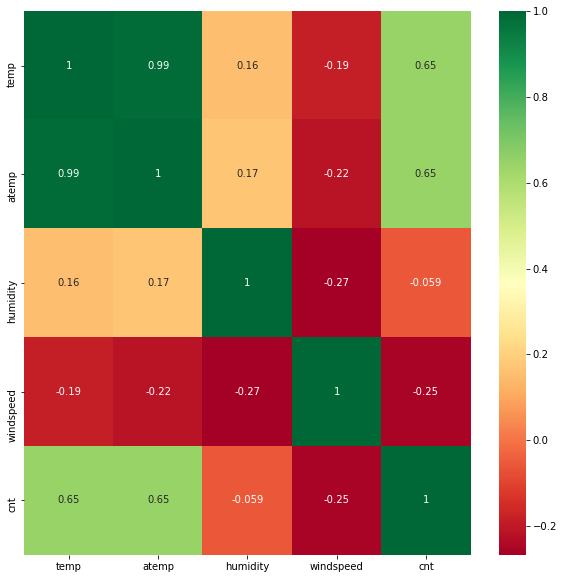

In [34]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10,10))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Correlation
1. cnt seems to have correlation with temp variable and atemp.
2. temp and atemp also have strong correlation
3. windspeed has a negative correlation with cnt


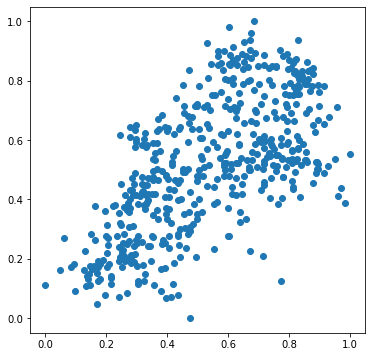

In [35]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

 Above Visualization confirms positive corelation between temp and cnt

In [36]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Linear Model Building

### Build a model using RFE

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('LightSnow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [39]:
rfe_sel_cols = X_train.columns[rfe.support_]
rfe_sel_cols

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')

### Build a model using statsmodel api
### Model - 1

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_sel_cols]
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,Jan,July,Sep,Sat,LightSnow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


In [41]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          4.22e-191
Time:                        12:28:34   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

### Model - 2

#### holiday has a high p-value hence dropping that

In [42]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

In [43]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          3.01e-191
Time:                        12:28:36   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -941.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2428      0.036      6.737      0.0

In [44]:
# Helper function to calculate variance inflation factor (VIF)
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [45]:
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,29.31
2,temp,17.66
1,workingday,4.73
4,windspeed,4.71
11,spring,4.48
13,winter,3.42
12,summer,2.84
10,Mist,2.28
0,year,2.09
8,Sat,1.84


### Model - 3
#### Since p-value and VIF are high for atemp dropping that

In [46]:
X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

KeyError: "['atemp'] not found in axis"

In [47]:
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,29.31
2,temp,17.66
1,workingday,4.73
4,windspeed,4.71
11,spring,4.48
13,winter,3.42
12,summer,2.84
10,Mist,2.28
0,year,2.09
8,Sat,1.84


### Model - 4
#### Since humidity has high VIF value, dropping that

In [48]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          8.68e-189
Time:                        12:28:38   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1657      0.031      5.292      0.0

In [49]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,Sat,1.84
4,Jan,1.62
5,July,1.59


### Model - 5
#### Since workingday has high VIF value, dropping that

In [50]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          9.49e-185
Time:                        12:28:39   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2099      0.031      6.829      0.0

In [51]:
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,5.16
2,windspeed,4.63
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
3,Jan,1.61
4,July,1.59
8,Mist,1.56
5,Sep,1.33


### Model - 6
#### Since Sat has high p-value, dropping that

In [52]:
X_train_rfe = X_train_rfe.drop(['Sat'], axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          4.79e-185
Time:                        12:28:40   Log-Likelihood:                 494.12
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2137      0.031      6.945      0.0

In [53]:
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,5.13
2,windspeed,4.61
8,spring,2.74
9,summer,2.24
0,year,2.07
10,winter,1.77
3,Jan,1.61
4,July,1.59
7,Mist,1.56
5,Sep,1.33


### Observations:
1. p-value for all variables are < 0.05
2. VIF is < 5 for all variables
3. We have clearly improved the model as the value of adjusted R-squared as its value 0.832
4. F-statistic value is very high and Prob (F-statistic) is also closer to 0. This indicates the model is stable and good

Based on the above observations, we will finalize this model and its associated parameters


# Step 7: Residual Analysis of the train data

In [54]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

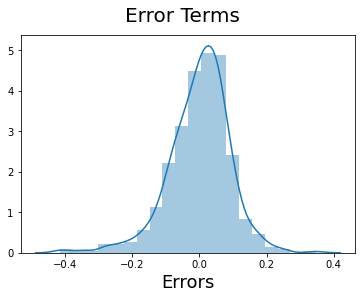

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [56]:
# Calculate R-squared value
round(r2_score(y_train,y_train_pred),3)

0.832

### Observations:

1. Error terms are normally distributed
2. R-squared value is 0.832 which is good

# Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

Applying the scaling on the test sets

In [57]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      510 non-null    float64
 1   year       510 non-null    int64  
 2   temp       510 non-null    float64
 3   windspeed  510 non-null    float64
 4   Jan        510 non-null    uint8  
 5   July       510 non-null    uint8  
 6   Sep        510 non-null    uint8  
 7   LightSnow  510 non-null    uint8  
 8   Mist       510 non-null    uint8  
 9   spring     510 non-null    uint8  
 10  summer     510 non-null    uint8  
 11  winter     510 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 23.9 KB


In [58]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [59]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [60]:
y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
# Now let's use our model to make predictions.
# Creating X_test dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_new)

In [62]:
# Making predictions using the last model

y_test_pred = lm.predict(X_test_sm)

# Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

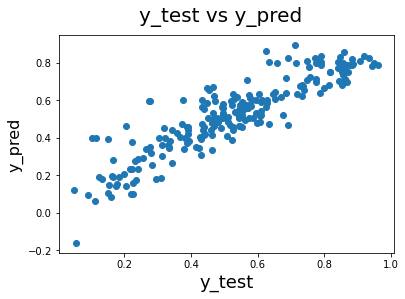

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # Y-label

Text(0.5, 0, 'Errors')

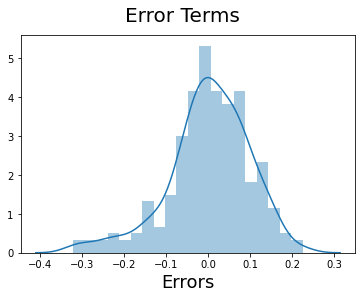

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [65]:
# Calculate R-squared value for test data
round(r2_score(y_test,y_test_pred), 3)

0.801

### Final Observations:

In [66]:
round(lm.params, 4)

const        0.2137
year         0.2347
temp         0.4727
windspeed   -0.1568
Jan         -0.0391
July        -0.0492
Sep          0.0729
LightSnow   -0.2813
Mist        -0.0776
spring      -0.0639
summer       0.0437
winter       0.0730
dtype: float64

#### The equation for the best fit line is:

cnt = 0.2586 + 0.2346year + 0.4493temp - 0.1410windspeed - 0.0698July + 0.0522Sep - 0.0443Sun - 0.2859LightSnow - 0.0797Mist - 0.1147spring + 0.0438winter

#### R-squared value for train data - 0.832
#### R-squared value for test data - 0.809

#### Conclusion:
1. The variables year, temp, weathersit(value=3 LightSnow), spring season are big factors influencing the demand of shared bikes.
2. Temperature and Year have positive effect/relation on the demand for bikes.
3. LightSnow and spring season have a negative effect on the demand.